**BREAST CANCER DETECTION USING SUPPORT VECTOR MACHINE(SVM)**

In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split#for splitting the dataset into training and testing of the dataset
from sklearn.neighbors import KNeighborsClassifier#for knn
from sklearn.svm import SVC#for support vector classifier
from sklearn import model_selection#for selecting the model such as knn,svc
from sklearn.metrics import classification_report#classification report
from sklearn.metrics import accuracy_score#Accuracy score
import matplotlib.pyplot as plt#for data visualization
import pandas as pd#for data manipulation
import seaborn as sns#for data visualization
import numpy as np# for calculation

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)

In [3]:
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
# Preprocess the data
df.replace('?',-99999, inplace=True)#replacing the columns values
print(df.axes)

df.drop(columns="id",inplace=True)#dropping the column id since its  no use for the calculation purpose

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


In [5]:
# Describe the dataset
print(df.describe())

       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.000000       699.000000   
mean            2.806867                3.216023         3.437768   
std             2.855379                2.214300         2.438364   
min             1.000000                1.000000         1.000000   
25%             1.000000                2.000000         2.000000   


<Axes: >

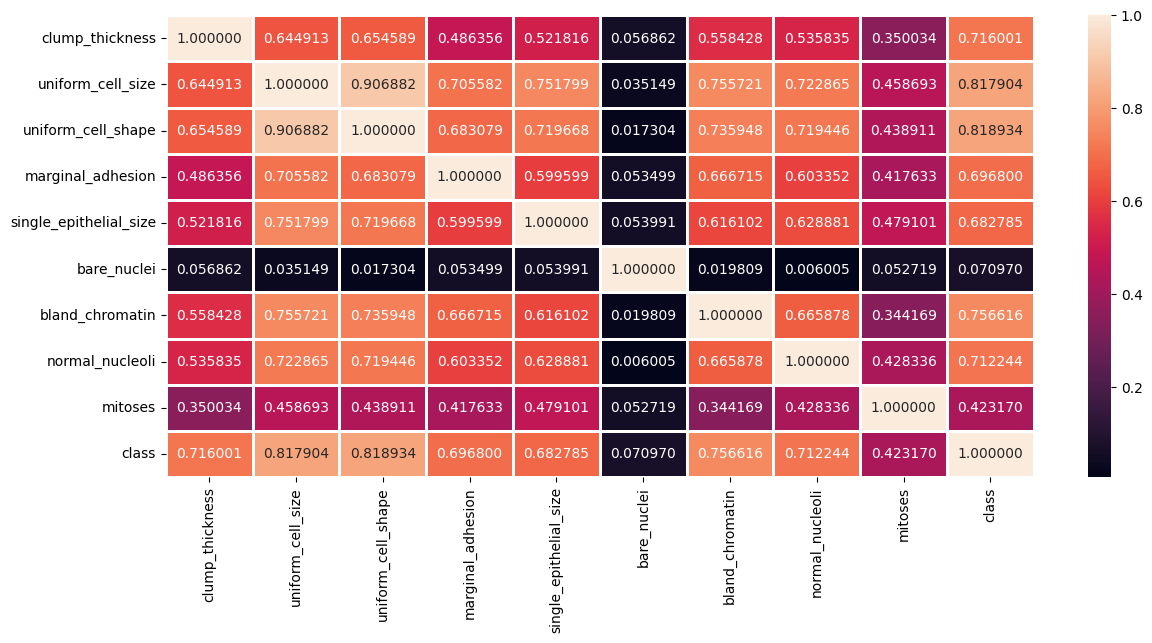

In [6]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(),annot=True,fmt="f",linewidths=0.8)#heatmap with respect to correlation

from this heatmap we can see that elements are correlated to each other within a range of 0.7 to -0.7

In [7]:
# Create X and Y datasets for training
X = df.drop(columns="class")
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#splits the dataset into to 80% training and 20% testing

In [8]:
# Define models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.966039 (0.023192)
SVM: 0.661948 (0.065808)


In [9]:
model1=SVC(kernel="linear")#tuning
svm_model=model1.fit(X_train,y_train)

In [10]:
y_pred_svm=svm_model.predict(X_test)

In [11]:
accuracy_score(y_pred_svm,y_test)

0.9785714285714285

In [12]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))
    print("----------------------------------------------")

# Accuracy - ratio of correctly predicted observation to the total observations.
# Precision - (false positives) ratio of correctly predicted positive observations to the total predicted positive observations
# Recall (Sensitivity) - (false negatives) ratio of correctly predicted positive observations to the all observations in actual class - yes.
# F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false

KNN
0.9857142857142858
              precision    recall  f1-score   support

           2       0.98      1.00      0.99        88
           4       1.00      0.96      0.98        52

    accuracy                           0.99       140
   macro avg       0.99      0.98      0.98       140
weighted avg       0.99      0.99      0.99       140

----------------------------------------------
SVM
0.6285714285714286
              precision    recall  f1-score   support

           2       0.63      1.00      0.77        88
           4       0.00      0.00      0.00        52

    accuracy                           0.63       140
   macro avg       0.31      0.50      0.39       140
weighted avg       0.40      0.63      0.49       140

----------------------------------------------


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [16]:
clf = SVC()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example_measures = np.array([[5	,10	,10	,3	,7	,3	,8	,10, 3]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
if(prediction==[4]):
         print(prediction,("-malignant"))
else:
  print(prediction,("-benign"))

0.6285714285714286
[2] -benign


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
